<a href="https://colab.research.google.com/github/diazariana/CH_DataScience/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💵 **Default de préstamos** 💵

## Introducción

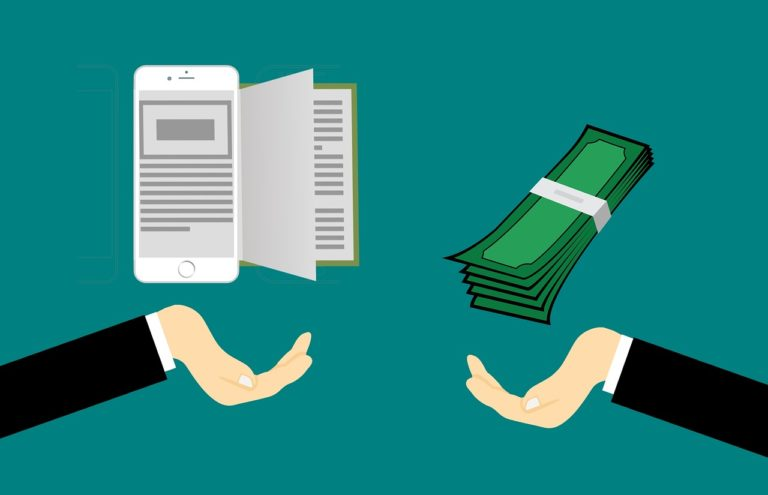


Los bancos obtienen grandes ganancias brindando préstamos, aunque esto siempre está asociado a un riesgo, ya que el tomador puede defaultear su préstamo.
Para mitigar este problema, con los datos sobre los tomadores de préstamo en el pasado y empleando mecanismos de Machine Learning se puede determinar la posibilidad de que se defaultee o no un préstamo.

La idea es determinar el tipo de perfil de cliente que tiene más probabilidades de no pagar el préstamo.

Fuente del dataset:  https://www.kaggle.com/datasets/yasserh/loan-default-dataset

El data set contiene

*   ID
*   year (año, 2019)
*   Loan limit (con o sin)
*   Gender (género)
*   Approved in advance (Pre aprobado: pre, nopre)
*   Loan Type  (type1, type2)
*   Loan Purpose (p1,p2,p3,p4)
*   Credit worthiness ("merecedor del crédito")
*   Open credit (El capital disponible bajo Open Credit se desembolsará en la cuenta que el Cliente desee: si, no)
*   Bussiness or commercial (bc, nbc)
*   Rate of interest
*   Interest rate spread
*   Upfront charges (otros cargos)
*   Term (plazo del préstamo, se asume en semanas)
*   Negotiative ammortization (si, no) 
*   Interest only (si, no)
*   Lump sum payment (Un "balloon payment" o pago global es un pago único, más grande de lo normal, que se hace al final del plazo del préstamo: si, no)
*   Property value (valor de la propiedad puesta en garantía)
*   Construction type (sb, mh)
*   Occupancy type (pr, ir)
*   Secured by (home, land)
*   Total units (se asume las unidades puestas en garantía 1u, 2u,etc)
*   Income (ingresos)
*   Credit type (tipo de crédito)
*   Credit Score 
*   Co-applicant credit type
*   Age (edad, rango etario)
*   Submission of application
*   LTV value (ratio préstamo-valor, ratio máximo del préstamo al valor o porcentaje de financiación​ expresa la cantidad de un primer derecho de retención de hipoteca como porcentaje del total del valor de tasación de los bienes inmuebles.)
*   Region (norte, sur, etc)
*   Security type
*   Status(1= defaulted 0= not defaulted)
*   Dtir 1


























Integrantes del equipo 🦸:


*   Ariana Diaz
*   Federico Martucci



In [ ]:
!pip install mlxtend 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Python'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Python


In [ ]:
df=pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


En primer lugar, y dado que el dataset contiene 34 variables, se van a definir las más significativas para poder analizarlas.

In [ ]:
df.shape

(148670, 34)

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Data Wrangling 📋

### Análisis valores faltantes

In [ ]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

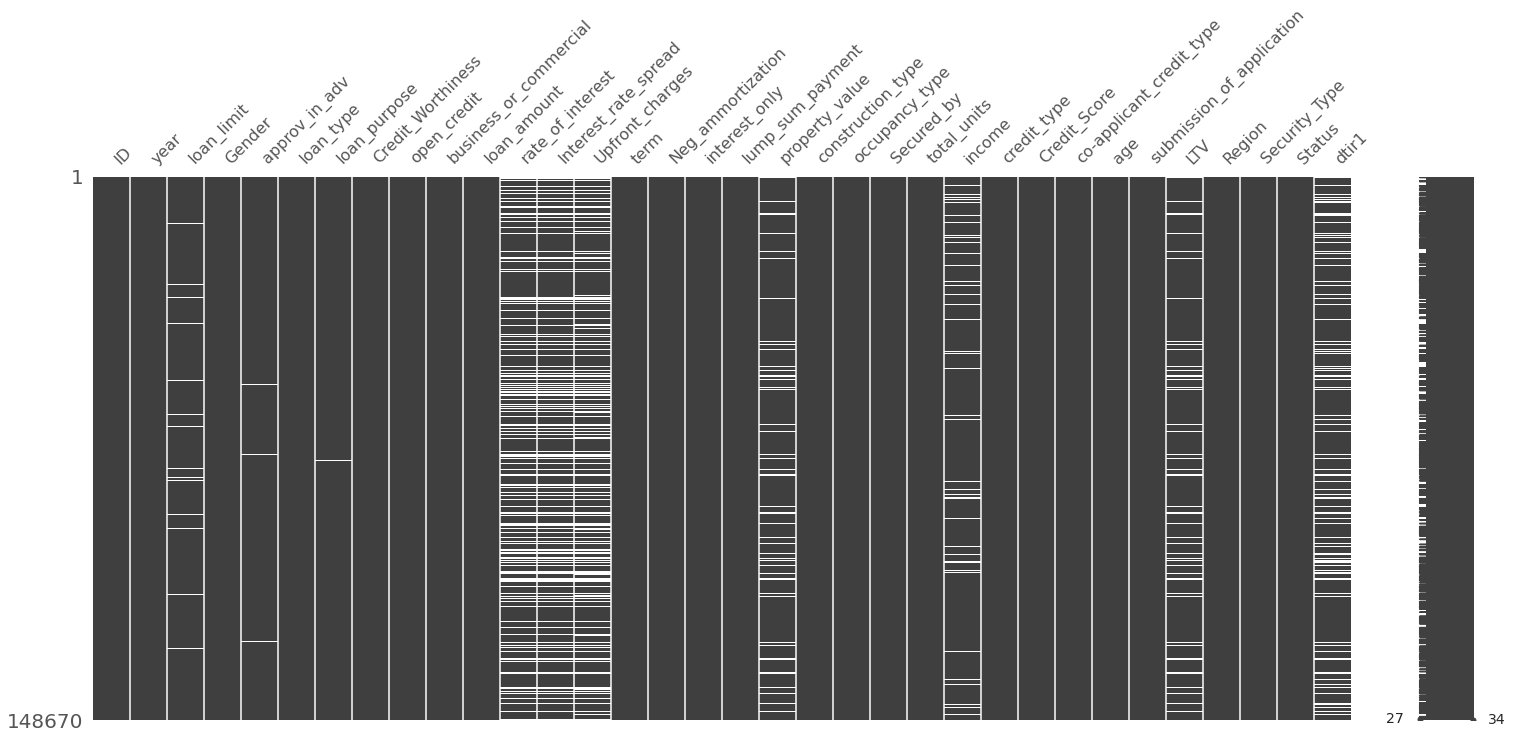

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

La mayoría de los prestamos en default (Status=1) cuentan con datos faltantes en sus variables.

In [ ]:
#Primero se va a crear una uneva categoría en las variables categóricas para los nan: "ns/nc"
df_clean=df.copy()
varscat=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 
'occupancy_type', 'Secured_by','total_units','credit_type' ,'co-applicant_credit_type', 'age', 'submission_of_application', 
'Region', 'Security_Type']
varsnoncat=['ID', 'year', 'loan_amount', 'rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value', 'income','Credit_Score','LTV', 'Status','dtir1']

for i,var in enumerate(varscat):
  df_clean[var] = np.where(df_clean[var].isnull(),"ns/nc",df_clean[var])
 

In [ ]:
#Para las variables que no son categóricas se completarán con la media
df_clean.fillna(df_clean.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## EDA - Exploratory Data Analysis 📊




In [ ]:
df.shape

(148670, 34)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


Se realizará un análisis de las variables que se consideran a primera vista como las más destacadas.

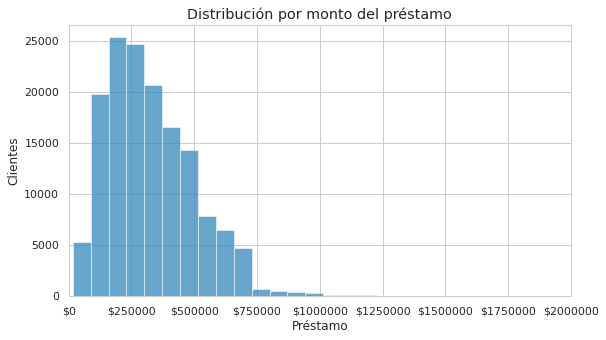

In [ ]:
#Histograma por monto del préstamo
#mpl.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(9, 5))
sns.histplot(data=df, x="loan_amount", bins=50)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Préstamo', ylabel='Clientes')
ax.set_title('Distribución por monto del préstamo')
plt.xlim(0,2000000)
plt.show()

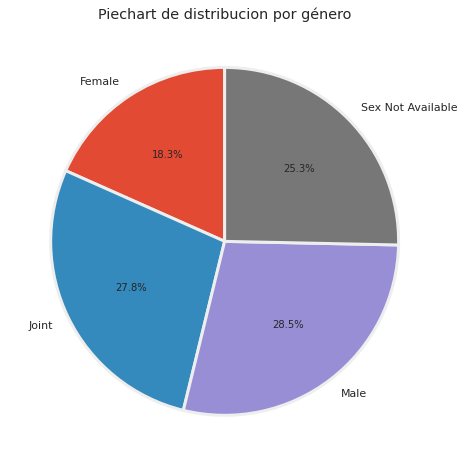

In [ ]:
df_genero=df[['ID','Gender']].groupby(by='Gender').count()
#Grafico de torta del genero de los tomadores de préstamos
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize =(12, 8))
ax.pie(df_genero.ID,labels=df_genero.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax.set_title('Piechart de distribucion por género')
plt.show()

Si bien la mayor proporcion de personas que toman un prestamo son hombres (y muy cerca aquellos que son mas de una persona, por ejemplo una pareja), dado que en un 25% de los prestamistas no hay datos sobre su género, es probable que este dato no sea correcto. A priori, menor cantidad de mujeres piden prestamos que hombres.

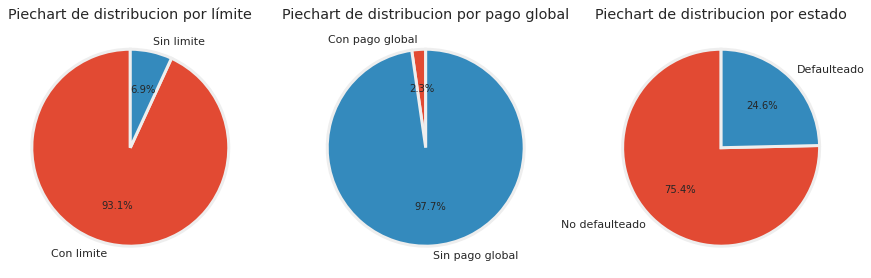

In [ ]:
df_limit=df[['ID','loan_limit']].groupby(by='loan_limit').count()
df_lump=df[['ID','lump_sum_payment']].groupby(by='lump_sum_payment').count()
df_status=df[['ID','Status']].groupby(by='Status').count()
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,9))
labels1='Con limite', 'Sin limite'
labels2='Con pago global', 'Sin pago global'
labels3='No defaulteado', 'Defaulteado' 

ax1.pie(df_limit.ID,labels=labels1, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3}, )
ax1.set_title('Piechart de distribucion por límite')

ax2.pie(df_lump.ID,labels=labels2, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax2.set_title('Piechart de distribucion por pago global')

ax3.pie(df_status.ID,labels=labels3,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax3.set_title('Piechart de distribucion por estado')
plt.show()

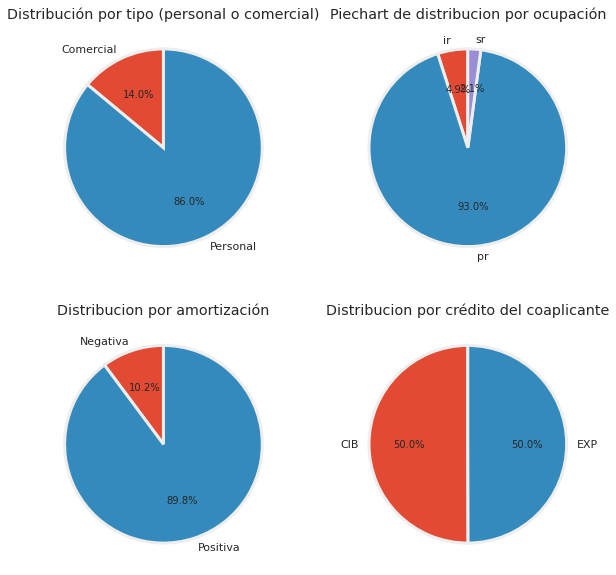

In [ ]:
df_com=df[['ID','business_or_commercial']].groupby(by='business_or_commercial').count()
df_occ_type=df[['ID','occupancy_type']].groupby(by='occupancy_type').count()
df_neg_amort=df[['ID','Neg_ammortization']].groupby(by='Neg_ammortization').count()
df_co_app=df[['ID','co-applicant_credit_type']].groupby(by='co-applicant_credit_type').count()

plt.style.use('ggplot')
fig, ax = plt.subplots(2, 2, figsize=(10,10))
labels4='Comercial', 'Personal'
labels5='Negativa',  'Positiva'

ax[0,0].pie(df_com.ID,labels=labels4, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3}, )
ax[0,0].set_title('Distribución por tipo (personal o comercial)')

ax[0,1].pie(df_occ_type.ID,labels=df_occ_type.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[0,1].set_title('Piechart de distribucion por ocupación')

ax[1,0].pie(df_neg_amort.ID,labels=labels5,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,0].set_title('Distribucion por amortización')

ax[1,1].pie(df_co_app.ID,labels=df_co_app.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,1].set_title('Distribucion por crédito del coaplicante')
plt.show()

Text(0.5, 1.0, 'Distribución por tipo de crédito')

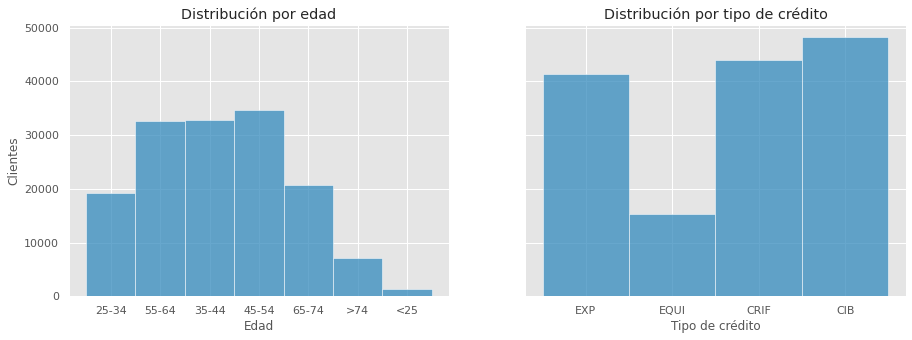

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.set_style("whitegrid")
sns.color_palette("Paired")
sns.histplot(ax=ax[0],data=df, x="age")
ax[0].set(xlabel='Edad', ylabel='Clientes')
ax[0].set_title('Distribución por edad')

sns.histplot(ax=ax[1], data=df, x="credit_type")
ax[1].set(xlabel='Tipo de crédito', ylabel='Clientes')
ax[1].set_title('Distribución por tipo de crédito')

La mayor cantidad de gente que pide prestamos se encuentra entre 35 y 64  años. Los jubilados es probable que no necesiten tomar préstamos y los menores de 34 quizas necesiten mayores estabilidad económica antes de solicitar uno.


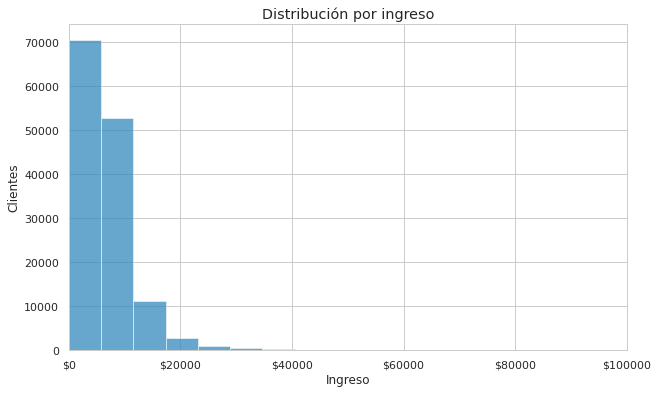

In [ ]:
#Histograma por ingresos
sns.set_style("whitegrid")
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.histplot(data=df, x="income", bins=100)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Ingreso', ylabel='Clientes')
ax.set_title('Distribución por ingreso')
plt.xlim(0,100000)
plt.show()

Como vimos en clase, son pocos los que ganan mucho y muchos los que ganan poco. Asimetría a derecha

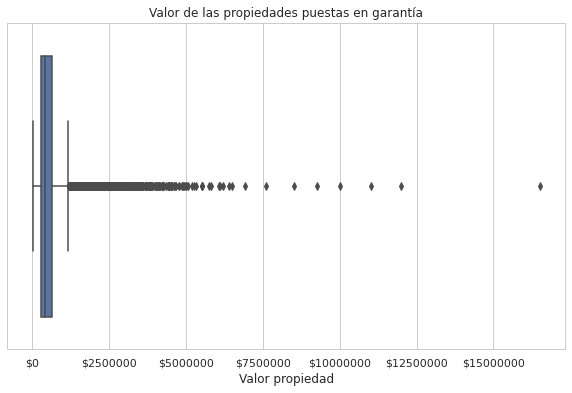

In [ ]:
#Valores de las propiedades como garantía
fig,ax = plt.subplots(figsize =(10, 6))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
sns.boxplot(data=df, x='property_value')
ax.set(xlabel='Valor propiedad')
ax.set_title('Valor de las propiedades puestas en garantía')
plt.show()

Mucha variabilidad y outliers en los precios de las propiedades.

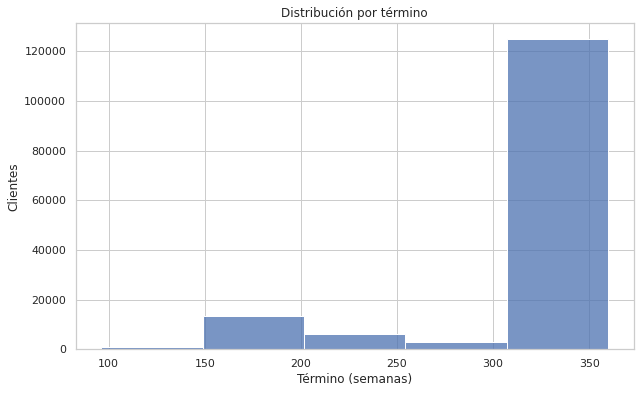

In [ ]:
#Histograma por tiempo del préstamo
#No indica en que unidades es el tiempo en que se toma el préstamos, se asume semanas.
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.histplot(data=df, x="term", bins=5)
ax.set(xlabel='Término (semanas)', ylabel='Clientes')
ax.set_title('Distribución por término')
plt.show()

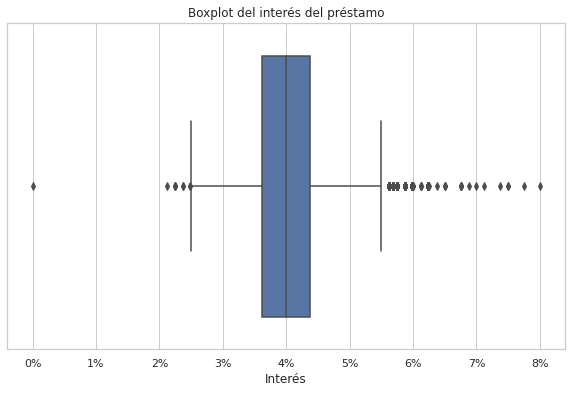

In [ ]:
#Interés del préstamo
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.boxplot(data=df, x='rate_of_interest')
ax.set(xlabel='Interés')
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d%%'))
ax.set_title('Boxplot del interés del préstamo')
plt.show()

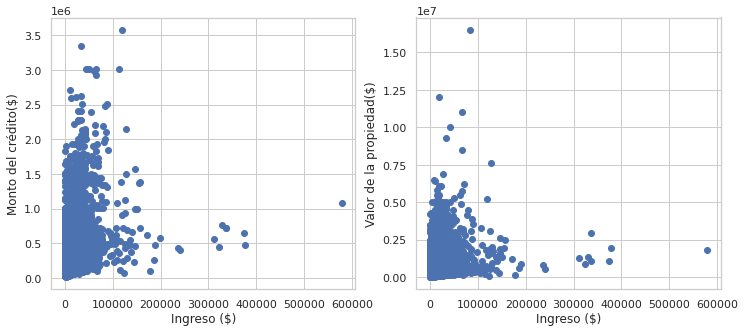

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(data=df, x='income', y='loan_amount')
plt.xlabel("Ingreso ($)")
ax1.set_ylabel("Monto del crédito($)")

ax2.scatter(data=df, x='income', y='property_value')
ax1.set_xlabel("Ingreso ($)")
ax2.set_ylabel("Valor de la propiedad($)")
plt.show()

Se puede ver como las personas con menos ingresos son quienes toman préstamos con montos más altos.

Tiene sentido que a menor ingreso, menor sea el valor de la propiedad.

<function matplotlib.pyplot.show>

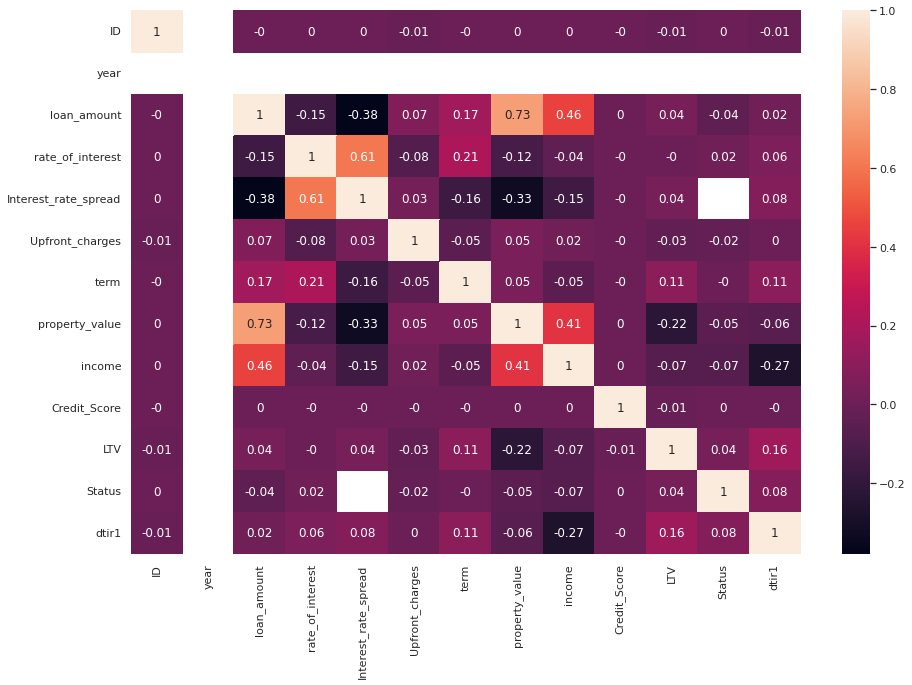

In [ ]:
#Correlation analysis
plt.figure(figsize = (15,10))
sns.heatmap(df.corr().round(2), annot=True)
plt.show

El monto del préstamos se encuentra mayormente relacionado con el valor de la propiedad y el ingreso de el/los cliente(s).
El interés esta bastante relacionado con  el plazo del préstamo.

[Text(0, 0.5, 'Ingresos ($)'), Text(0.5, 0, 'Fin del préstamo')]

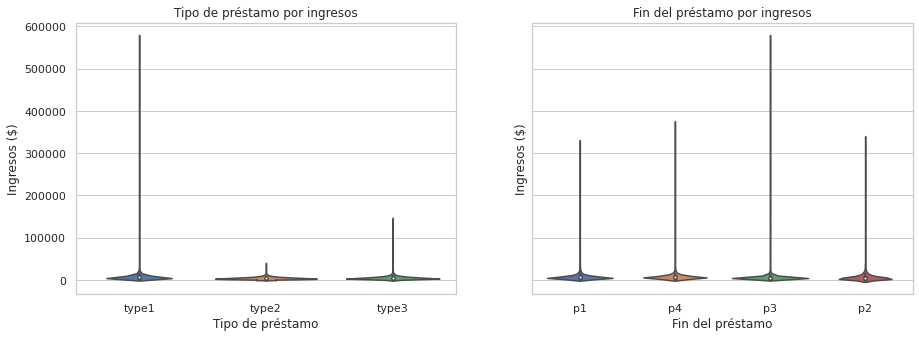

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)

sns.violinplot(data=df, ax=ax[0], x='loan_type', y='income')
ax[0].set_title('Tipo de préstamo por ingresos')
ax[0].set(xlabel='Tipo de préstamo', ylabel='Ingresos ($)')

sns.violinplot(data=df, ax=ax[1], x='loan_purpose', y='income')
ax[1].set_title('Fin del préstamo por ingresos')
ax[1].set(xlabel='Fin del préstamo', ylabel='Ingresos ($)')

Dentro de los tipos de préstamo, se puede ver como en el tipo 2 y tres los ingresos son mucho menos variables que en el tipo 1.

Parece que la finalidad del préstamos, en el caso 4 el monto del préstamo es mayor que en los otros casos. Seguido por el caso 1 y el 3. El caso 2 sería el menor. Los montos mas variables se encuentran en el caso 1 y 4

Text(0.5, 1.0, 'Tipo de préstamo por monto del préstamo')

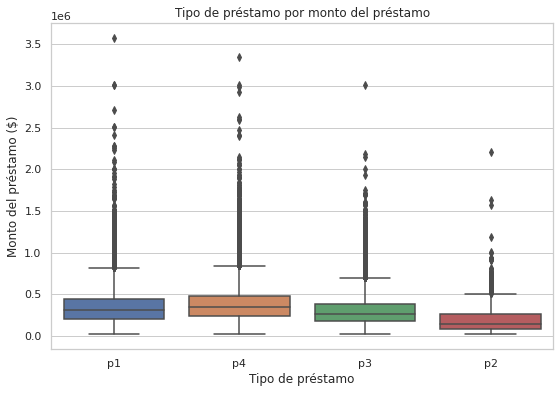

In [ ]:
#Boxplot
fig,ax = plt.subplots(figsize =(9, 6))
sns.boxplot(data=df, x='loan_purpose', y='loan_amount')
ax.set(xlabel='Tipo de préstamo', ylabel='Monto del préstamo ($)')
ax.set_title('Tipo de préstamo por monto del préstamo')

Aparentemente, el tipo prestamo 1 tiene mayores montos, seguido por el 4, 3 y 2 en ese orden.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Monto del crédito')

<Figure size 432x288 with 0 Axes>

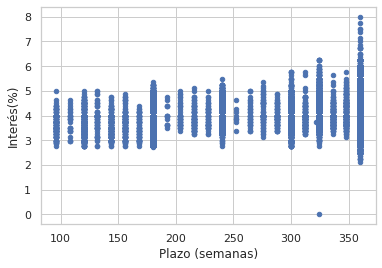

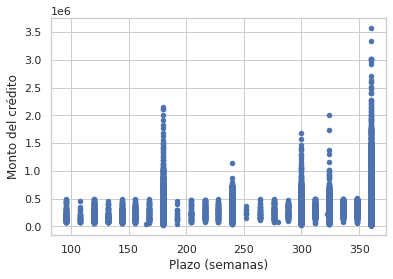

In [ ]:
fig = plt.figure()
ax1 = df.plot.scatter(x='term', y='rate_of_interest')
plt.xlabel("Plazo (semanas)")
plt.ylabel("Interés(%)")

ax2 = df.plot.scatter(x="term", y="loan_amount")
plt.xlabel("Plazo (semanas)")
plt.ylabel("Monto del crédito")

A simple vista, aumenta el interés a medida que aumenta el plazo del crédito.

Son mas altos los prestamos con plazos mayores.

Text(0, 0.5, 'Monto del crédito($)')

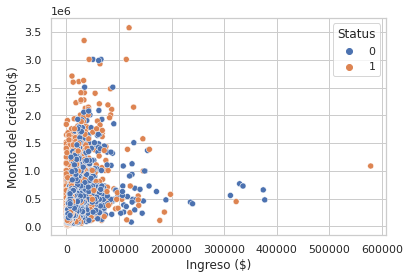

In [ ]:
sns.scatterplot(data=df,x='income', y='loan_amount', hue='Status')
plt.xlabel("Ingreso ($)")
plt.ylabel("Monto del crédito($)")

Text(0, 0.5, 'Valor de la propiedad($)')

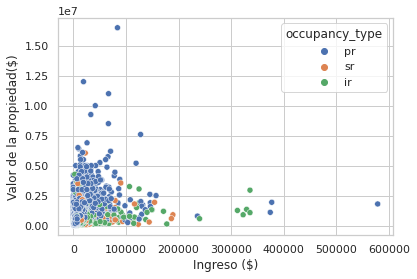

In [ ]:
sns.scatterplot(data=df, x='income', y='property_value', hue='occupancy_type')
plt.xlabel("Ingreso ($)")
plt.ylabel("Valor de la propiedad($)")

Conclusiones principales:


*  **Las personas con menos ingresos son quienes toman préstamos con montos más altos.**
*   **La mayor cantidad de gente que pide prestamos se encuentra entre 35 y 64 años.**
*   **A menor ingreso, menor sea el valor de la propiedad**.
*   Aumenta el interés a medida que aumenta el plazo del crédito.
*   Son mas altos los préstamos con plazos mayores.
*   La mayoría de los préstamos son personales.
*   **La correlación de la variable target con las variables no categóricas es baja.**
*   **Apróximadamente un 25% de los préstamos no fue abonado por el cliente.**











